# Proses Pembentukan Populasi atau Dataset

sumber data : playstore

In [114]:
from google_play_scraper import app
import pandas as pd
from google_play_scraper import Sort, reviews_all
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\said.gani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\said.gani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [108]:
plt.rcParams["figure.figsize"] = (8, 6)

In [2]:
result = reviews_all(
    'com.pegadaiandigital',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None(means all score) ya, skornya 1-1 aja dulu yaaa...
)

In [3]:
reviewid = []
username =[]
comment = []
jml_komen_disukai = []
score = []
waktu = []
user_image = []
for i in range(len(result)):
    reviewid.append(result[i]['reviewId'])
    username.append(result[i]['userName'])
    comment.append(result[i]['content'])
    jml_komen_disukai.append(result[i]["thumbsUpCount"])
    score.append(result[i]["score"])
    waktu.append(result[i]["at"])
    user_image.append(result[i]["userImage"])
    
df = pd.DataFrame(list(zip(reviewid, user_image, username, comment, jml_komen_disukai, score, waktu)),
               columns =['review_id', 'user_image','nama_user', 'komentar', 'jml_komen_disukai', 'rating', 'waktu'])    

In [4]:
result

[{'reviewId': 'gp:AOqpTOEoLu0QZzhSuC_ZNTwrypkHMo5R9pZrHVF3wpJ1mGhhut9o719-gH2Rd3NknR63Q_VG6we8S8sGJ3LMGj4',
  'userName': 'Dery Rovino MA ApplLing',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14Ggi1GF0JBwDw0Rgkz9gjE6w17o78dnIz8XENvoP2Q',
  'content': "Can't even open gold savings account. App always crashes. Good intention, bad execution.",
  'score': 1,
  'thumbsUpCount': 5,
  'reviewCreatedVersion': '4.7.1',
  'at': datetime.datetime(2020, 6, 16, 21, 10, 25),
  'replyContent': 'Hi, can you please send us your account details along with the screenshot of the problem to customer.care@pegadaian.co.id so that we can help you. Thank you for using our app.',
  'repliedAt': datetime.datetime(2020, 6, 17, 19, 57, 41)},
 {'reviewId': 'gp:AOqpTOEbLnyDBmfORixSoWj0jylF9NlDfNhWh9bTON0hnjNoUDYsJQywByH76OMtoPVH91rha5_gj04zi_XpgXE',
  'userName': 'Martha Ayu',
  'userImage': 'https://play-lh.googleusercontent.com/a-/AOh14GhGdJc51UWc8eH8NztlRnzE33qJAvgDxjPOrvRIDg',
  'content': 'This

In [5]:
df

,review_id,user_image,nama_user,komentar,jml_komen_disukai,rating,waktu
0,gp:AOqpTOEoLu0QZzhSuC_ZNTwrypkHMo5R9pZrHVF3wpJ...,https://play-lh.googleusercontent.com/a-/AOh14...,Dery Rovino MA ApplLing,Can't even open gold savings account. App alwa...,5,1,2020-06-16 21:10:25
1,gp:AOqpTOEbLnyDBmfORixSoWj0jylF9NlDfNhWh9bTON0...,https://play-lh.googleusercontent.com/a-/AOh14...,Martha Ayu,This app totally burn out my emotion. Many tim...,30,2,2021-12-22 06:37:00
2,gp:AOqpTOFg6aYsEMi8nzJeBVZ38kdR8pwGZjF-cjpdGA5...,https://play-lh.googleusercontent.com/a-/AOh14...,Aqwam Himami,"always error, never success to upgrade account...",7,1,2022-01-24 14:29:29
3,gp:AOqpTOHEjH_HraSZ0QUQ37UGro_6QcoxgYYG7P4DUz4...,https://play-lh.googleusercontent.com/a-/AOh14...,Ilham Izzul,I dont know why but i cant login into my accou...,0,1,2022-01-29 21:41:49
4,gp:AOqpTOHkghSIt86L4TVJjSYE7IMBF7Zu51OWBOA8sdh...,https://play-lh.googleusercontent.com/a-/AOh14...,Abi Panca Gumilang,"Ridiculous apps, ""akun diposes max 3x24 jam"", ...",74,1,2021-10-23 00:37:06
...,...,...,...,...,...,...,...
4778,gp:AOqpTOEVzgaaE2bxIR_1bq54lCi-vl1oI2oxefmXts_...,https://play-lh.googleusercontent.com/a/AATXAJ...,R Hendra S,good,0,4,2021-03-07 12:26:46
4779,gp:AOqpTOFRsmiDV6ynDelpPYggUp-pX4mvmYEl5yZ7T7K...,https://play-lh.googleusercontent.com/a/AATXAJ...,Fadjar Rijantono,Good,0,5,2021-03-09 16:01:51
4780,gp:AOqpTOGXFHZHF5CnR2QG10lTNySeabOL1a41xmiXqHm...,https://play-lh.googleusercontent.com/a-/AOh14...,Bunga Sidabariba,Good,0,5,2020-11-08 10:18:46
4781,gp:AOqpTOF2UImry9-DFOiPvu0T4Rv-z-GMt0evTCiHaOG...,https://play-lh.googleusercontent.com/a-/AOh14...,Londri Saputra,Gooood,0,5,2018-07-28 18:19:55


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4783 entries, 0 to 4782
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   review_id          4783 non-null   object        
 1   user_image         4783 non-null   object        
 2   nama_user          4783 non-null   object        
 3   komentar           4783 non-null   object        
 4   jml_komen_disukai  4783 non-null   int64         
 5   rating             4783 non-null   int64         
 6   waktu              4783 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 261.7+ KB


In [7]:
df.waktu.min()

Timestamp('2018-01-11 11:43:49')

In [8]:
df.waktu.max()

Timestamp('2022-02-04 13:13:45')

In [9]:
df.head(3)

,review_id,user_image,nama_user,komentar,jml_komen_disukai,rating,waktu
0,gp:AOqpTOEoLu0QZzhSuC_ZNTwrypkHMo5R9pZrHVF3wpJ...,https://play-lh.googleusercontent.com/a-/AOh14...,Dery Rovino MA ApplLing,Can't even open gold savings account. App alwa...,5,1,2020-06-16 21:10:25
1,gp:AOqpTOEbLnyDBmfORixSoWj0jylF9NlDfNhWh9bTON0...,https://play-lh.googleusercontent.com/a-/AOh14...,Martha Ayu,This app totally burn out my emotion. Many tim...,30,2,2021-12-22 06:37:00
2,gp:AOqpTOFg6aYsEMi8nzJeBVZ38kdR8pwGZjF-cjpdGA5...,https://play-lh.googleusercontent.com/a-/AOh14...,Aqwam Himami,"always error, never success to upgrade account...",7,1,2022-01-24 14:29:29


In [11]:
df['rating'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [12]:
def kategori(x):
    if x == 4 or x == 5:
        return 'Positif'
    elif x == 3:
        return 'Netral'
    elif x == 1 or x == 2:
        return 'Negatif'
df['sentimen'] = df['rating'].apply(kategori)        

In [13]:
df['sentimen'].unique()

array(['Negatif', 'Positif', 'Netral'], dtype=object)

In [14]:
df.head(3)

,review_id,user_image,nama_user,komentar,jml_komen_disukai,rating,waktu,sentimen
0,gp:AOqpTOEoLu0QZzhSuC_ZNTwrypkHMo5R9pZrHVF3wpJ...,https://play-lh.googleusercontent.com/a-/AOh14...,Dery Rovino MA ApplLing,Can't even open gold savings account. App alwa...,5,1,2020-06-16 21:10:25,Negatif
1,gp:AOqpTOEbLnyDBmfORixSoWj0jylF9NlDfNhWh9bTON0...,https://play-lh.googleusercontent.com/a-/AOh14...,Martha Ayu,This app totally burn out my emotion. Many tim...,30,2,2021-12-22 06:37:00,Negatif
2,gp:AOqpTOFg6aYsEMi8nzJeBVZ38kdR8pwGZjF-cjpdGA5...,https://play-lh.googleusercontent.com/a-/AOh14...,Aqwam Himami,"always error, never success to upgrade account...",7,1,2022-01-24 14:29:29,Negatif


In [18]:
df.shape

(4783, 8)

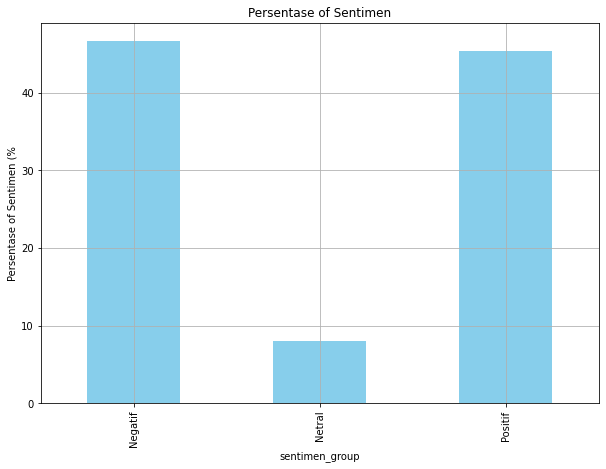

In [109]:
sentimen_group = df.groupby('sentimen')['sentimen'].count() / df.shape[0] * 100
ax = sentimen_group.plot(
    kind = 'bar',
    color = 'skyblue',
    grid = True,
    figsize = (10,7),
    title = 'Persentase of Sentimen'

)
ax.set_xlabel("sentimen_group")
ax.set_ylabel('Persentase of Sentimen (%')
plt.show()

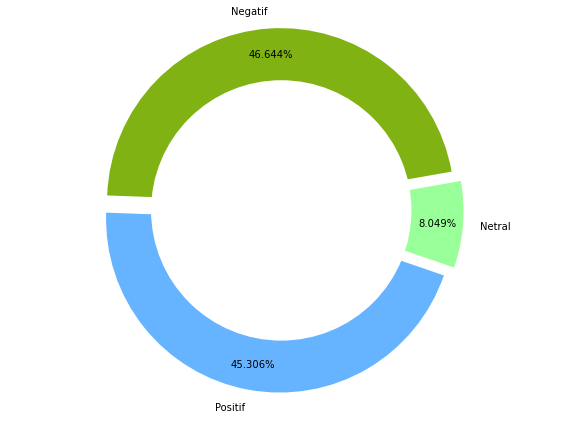

In [110]:
labels = df.sentimen.value_counts().keys()
sizes = df.sentimen.value_counts()

#add colors
colors = ['#81b214', '#66b3ff', '#99ff99']

#explsion
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.3f%%',
        startangle=10, pctdistance=0.85, explode=explode,
        labeldistance=1.1)

centre_circle = plt.Circle((0, 0), 0.75, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

# Praproses

## caseFolding 

In [34]:
def caseFolding(comment):
    comment = comment.lower()
    comment = comment.strip(" ")
    comment = re.sub(r'[?|$|.|!]',r'', comment)
    comment = re.sub(r'[^a-zA-Z0-9 ]',r'', comment)
    return comment

df['komentar_cleaned'] = df['komentar'].apply(caseFolding)

In [37]:
df[['komentar_cleaned']].head(13)

,komentar_cleaned
0,cant even open gold savings account app always...
1,this app totally burn out my emotion many time...
2,always error never success to upgrade account ...
3,i dont know why but i cant login into my accou...
4,ridiculous apps akun diposes max 3x24 jam the ...
5,i was be this user since 2017 i actually reall...
6,pegadaian digital isnt digital enough when my ...
7,i tried to login but it kept saying password i...
8,i paid for my transaction from this appafter f...
9,need huge improvement indeed not even close to...


## tokenizing 

In [48]:
def tokenize(comment):
    comment = comment.split(' ')
    data = []
    a = -1
    for x in comment:
        a += 1
    if x == '':
        data.append(a)
    p = 0 
    b = 0
    for y in data:
        b = y - p
        del comment[b]
        p += 1       
    return comment

df['komentar_cleaned'] = df['komentar_cleaned'].apply(tokenize)

In [49]:
df[['komentar_cleaned']]

,komentar_cleaned
0,"[cant, even, open, gold, savings, account, app..."
1,"[this, app, totally, burn, out, my, emotion, m..."
2,"[always, error, never, success, to, upgrade, a..."
3,"[i, dont, know, why, but, i, cant, login, into..."
4,"[ridiculous, apps, akun, diposes, max, 3x24, j..."
...,...
4778,[good]
4779,[good]
4780,[good]
4781,[gooood]


## filtering 

In [57]:
filtering = stopwords.words('indonesian', 'english')
df['komentar_cleaned'] = df['komentar_cleaned'].apply(lambda x: [item for item in x if item not in filtering])

## stemming 

In [60]:
def stemming(comment):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = []
    for word in comment:
        cek = stemmer.stem(word)
        data.append(cek)
    d_clean = []
    d_clean = " ".join(data)
    return d_clean
df['komentar_cleaned'] = df['komentar_cleaned'].apply(stemming)

In [61]:
df[['komentar_cleaned']]

,komentar_cleaned
0,cant even open gold savings account app always...
1,this app totally burn out my emotion many time...
2,always error never success to upgrade account ...
3,i dont know why but i cant login into my accou...
4,ridiculous apps akun diposes max 3x24 jam the ...
...,...
4778,good
4779,good
4780,good
4781,gooood


## semifinal 

In [62]:
df_clean = df[['komentar_cleaned', 'sentimen']]

In [65]:
df_clean['komentar_cleaned'] = df['komentar_cleaned'].astype('category') 
df_clean['sentimen'] = df['sentimen'].astype('string') 

<ipython-input-65-0d22638c7dff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['komentar_cleaned'] = df['komentar_cleaned'].astype('category')
<ipython-input-65-0d22638c7dff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentimen'] = df['sentimen'].astype('string')


In [67]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(df_clean['komentar_cleaned'].astype('O'))
text_tf

<4783x5790 sparse matrix of type '<class 'numpy.float64'>'
	with 50299 stored elements in Compressed Sparse Row format>

In [69]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, df_clean['sentimen'], test_size = 0.2, random_state = 43)

In [72]:
rf_model = RandomForestClassifier(n_estimators = 200, max_depth = 5)
rf_model.fit(X_train, y_train)

rf_preds_train = rf_model.predict(X_train)
rf_preds_test = rf_model.predict(X_test)
print("random forest classifier :\n> Accuracy on training data = {:.4f}\n> Accuracy on test data = {:.4f}".format(
    accuracy_score(y_train, rf_preds_train),
    accuracy_score(y_test, rf_preds_test)
))

random forest classifier :
> Accuracy on training data = 0.7912
> Accuracy on test data = 0.7586


## ROC AUC 

In [80]:
confusion_matrix(y_test, rf_model.predict(X_test))

array([[396,   0,  19],
       [ 73,   0,   8],
       [131,   0, 330]], dtype=int64)

In [88]:
y_pred = rf_model.predict(X_test)

In [85]:
print(accuracy_score(y_test, rf_model.predict(X_test)))

0.7586206896551724


In [101]:
rf_model.classes_

array(['Negatif', 'Netral', 'Positif'], dtype=object)

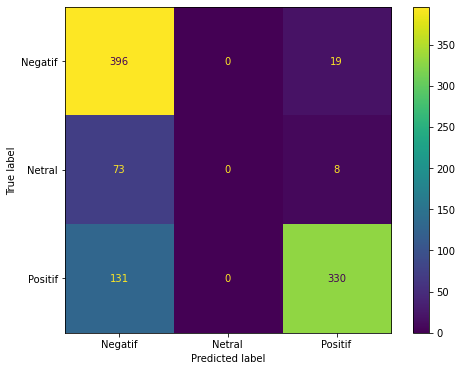

In [111]:
cm = confusion_matrix(y_test, y_pred, labels = rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot()

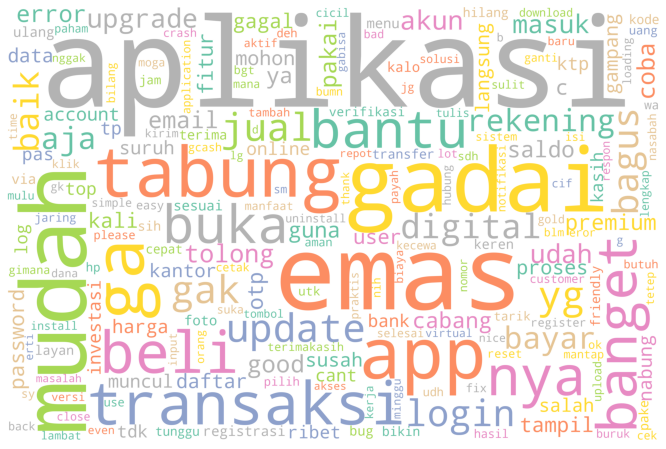

In [117]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
words = ' '.join([word for word in df_clean['komentar_cleaned']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(words)
plot_cloud(wordcloud)